### Plotting the tuning curves of neurons in the cercal organs of a cricket insect

**Problem Statement**:

"This exercise is based on a set of artificial "experiments" that we've run on four simulated neurons that emulate the behavior found in the cercal organs of a cricket. Please note that all the supplied data is synthetic. Any resemblance to a real cricket is purely coincidental.

In the first set of experiments, we probed each neuron with a range of air velocity stimuli of uniform intensity and differing direction. We recorded the firing rate of each of the neurons in response to each of the stimulus values. Each of these recordings lasted 10 seconds and we repeated this process 100 times for each neuron-stimulus combination.

We've supplied you with a .mat file for each of the neurons that contains the recorded firing rates (in Hz). These are named neuron1neuron1, neuron2neuron2, neuron3neuron3, and neuron4neuron4. The stimulus, that is, the direction of the air velocity, is in the vector named stimstim."

The matrices contain the results of running a set of experiments in which we probed the synthetic neuron with the stimuli in stim. Each column of a neuron matrix contains the firing rate of that neuron (in Hz) in response to the corresponding stimulus value in stimstim. That is, n\text{th}nth column of neuron1neuron1 contains the 100 trials in which we applied the stimulus of value stim(n) to neuron1neuron1.

**The cricket cercal system** (left, [Image Reference](https://jeb.biologists.org/content/jexbio/211/11/1819/F1.large.jpg?width=800&height=600&carousel=1)), &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; **Directional tuning curve for interneuron 10-2a** (right, [Image Reference](https://jeb.biologists.org/content/jexbio/211/11/1819/F3.large.jpg?width=800&height=600&carousel=1))
<div>
<img style="float: left;" src="https://github.com/artisticsynapse/Computational-Neuroscience-Python-Code/blob/master/Images/The%20cricket%20cercal%20system.jpg?raw=true" width="300" /><img  src="https://github.com/artisticsynapse/Computational-Neuroscience-Python-Code/blob/master/Images/Directional%20tuning%20curve%20for%20interneuron%2010-2a..gif?raw=true" width="450"/>    
</div>

**Pickled file containing the data: firing rate against stimulus**

In [14]:
URL = 'https://d3c33hcgiwev3.cloudfront.net/_e96f8f1cf1f8256c8595dcb9668fee4f_tuning_3.4.pickle?Expires=1574467200&Signature=bSQTdwYtVHJyvfyB0NqE0VCe88Q3cvcg6o4tgidVbofMnXPUIM2OpcYMmbFiOVrn5jTWFhOLAsnXTmJSwy2ufLisDVC23Kcuql8qfznzPmIxJaKgAIYE~7p3XEuScUYrIiu-CUUuChl1XPUAQL0KV~ooe-tXhD-IrWK-3nB4Pik_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A'

Data from Part III, and Chapter 10 in the textbook ["Theoretical Neuroscience by Dayan and Abbott"](http://www.gatsby.ucl.ac.uk/~dayan/book/exercises.html)

In [15]:
from urllib.request import urlretrieve 
urlretrieve(URL, 'tuning_3.4.pickle')

('tuning_3.4.pickle', <http.client.HTTPMessage at 0x231a4dd3f98>)

**Importing necessary packages:**

In [16]:
import pickle
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

**Unpickling, and loading the data:**

In [17]:
with open('tuning_3.4.pickle', 'rb') as f:
    data = pickle.load(f)

#print(data['stim']) - prints the stimulus values, where stimulus is the direction of the air velocity
#print(data['neuron1']) - firing rate in neuron 1; similarly neuron 2, neuron 3, neuron 4 on cerci organs of the cricket 
#each column of a neuron matrix contains the firing rate of that neuron (in Hz) in response to the corresponding stimulus value in stimstim. That is, n\text{th}nth column of neuron1neuron1 contains the 100 trials in which we applied the stimulus of value stim(n) to neuron1neuron1
#print(data.keys()) -  all the keys available in the dict
#print(data.items()) - all the keys, and their respective values (matrices in this case) 

**Plotting the tuning curve - the mean firing rate of the neuron as a function of the stimulus for each neurons**:

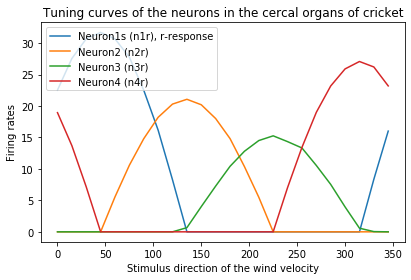

In [20]:
#using dict comprehension to filter items in python dictionary 'data' where keys containing a specific string 'neuron',to filter 
#out only "neuron"'s responses to calculate the mean firing rate column-wise in the next step

filtered_dict = {k:v for (k,v) in data.items() if 'neuron' in k} 
firing_rate = []

#tuple unpacking to iterate through the keys and values of the dictionary you are working with. to achieve this, you just need 
#to unpack the elements of every item into two different variables representing the key and the value.

for key, value in sorted(filtered_dict.items()):
    
    response = np.mean(value, axis = 0) # axis = 0 means along the column, and axis = 1 means working along the row.
    firing_rate.append(response) 

firing_rate=np.asarray(firing_rate)
fig, ax = plt.subplots()
ax.plot(data['stim'], np.transpose(firing_rate))
ax.set_title("Tuning curves of the neurons in the cercal organs of cricket")
ax.legend(['Neuron1s (n1r), r-response','Neuron2 (n2r)','Neuron3 (n3r)','Neuron4 (n4r)'],loc='upper left')
ax.set_xlabel('Stimulus direction of the wind velocity')
ax.set_ylabel('Firing rates')
fig.tight_layout()
plt.show()

From the results, it's clear that Neuron-1 doesn't follow the Poisson distribution. Two important features of a Poisson distribution are: <br>
1) Poisson distribution's have a 'Fano factor (Variance/Mean) = 1'. <br>
2) In poisson distribution, the spike interval distribution should be exponential. For low firing rate, the distribution is almost downward exponential, as the firing rate increase, it becomes more gaussian. As the mean increases, variance also increases; implying that as the mean value increases, the width of the distributions also increase.


**Directional tuning curves for ventral giant interneurons (vGIs) and dorsal giant interneurons (dGIs)** ([Reference](https://jeb.biologists.org/content/jexbio/211/11/1819/F4.large.jpg?width=800&height=600&carousel=1))
<div>
<img style="float: left;" src="https://github.com/artisticsynapse/Computational-Neuroscience-Python-Code/blob/master/Images/Directional%20tuning%20curves%20for%20ventral%20giant%20interneurons%20(vGIs)%20and%20dorsal%20giant%20interneurons%20(dGIs)..gif?raw=true width="450" />    
</div> 